In [1]:
#Gaussian mixture model
#it is flexible
#represents the probability distribution
#comes as sum of mutliple weighted gassian diatribution
#GMM will model data as a mixture of several gaussina distributions
#could be a combination / cluster of different gaussian models
#Each of the components represent a cluster

#Gaussian model has a set of its own parameters
#K-means performs hard clustering
#GMM performs soft clustering

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [6]:
data = pd.read_csv("iris.csv")

In [7]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
x= data.iloc[:,:4]
y= data.iloc[:,-1] 

In [9]:
sc =StandardScaler()
sc.fit(x)
std_array =sc.transform(x)
X = pd.DataFrame(std_array,columns = x.columns)

In [10]:
cluster =GaussianMixture(n_components=3)
cluster.fit(X)
y_pred =cluster.predict(X)
score = adjusted_rand_score(y,y_pred)
score

C:\Users\sumag\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.9038742317748124

In [12]:
from sklearn.decomposition import PCA

pca =PCA(n_components=2)
pca_array =pca.fit_transform(data.drop(['variety'],axis=1))
pca_df =pd.DataFrame(pca_array,columns=["PC1","PC2"])
pca_df.head()

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [13]:
col_code = {0:"yellow",1:"darkblue",2:"green"}
label = {0:"setosa",1:"versicolor",2:"virginica"}

pca_df["labels"]= pd.DataFrame(y_pred)
groups = pca_df.groupby('labels')

# Grouping instances based on species
groups.mean()

,PC1,PC2
labels,,
0,-2.640841,0.190520
1,2.031520,0.028510
2,0.451298,-0.246535


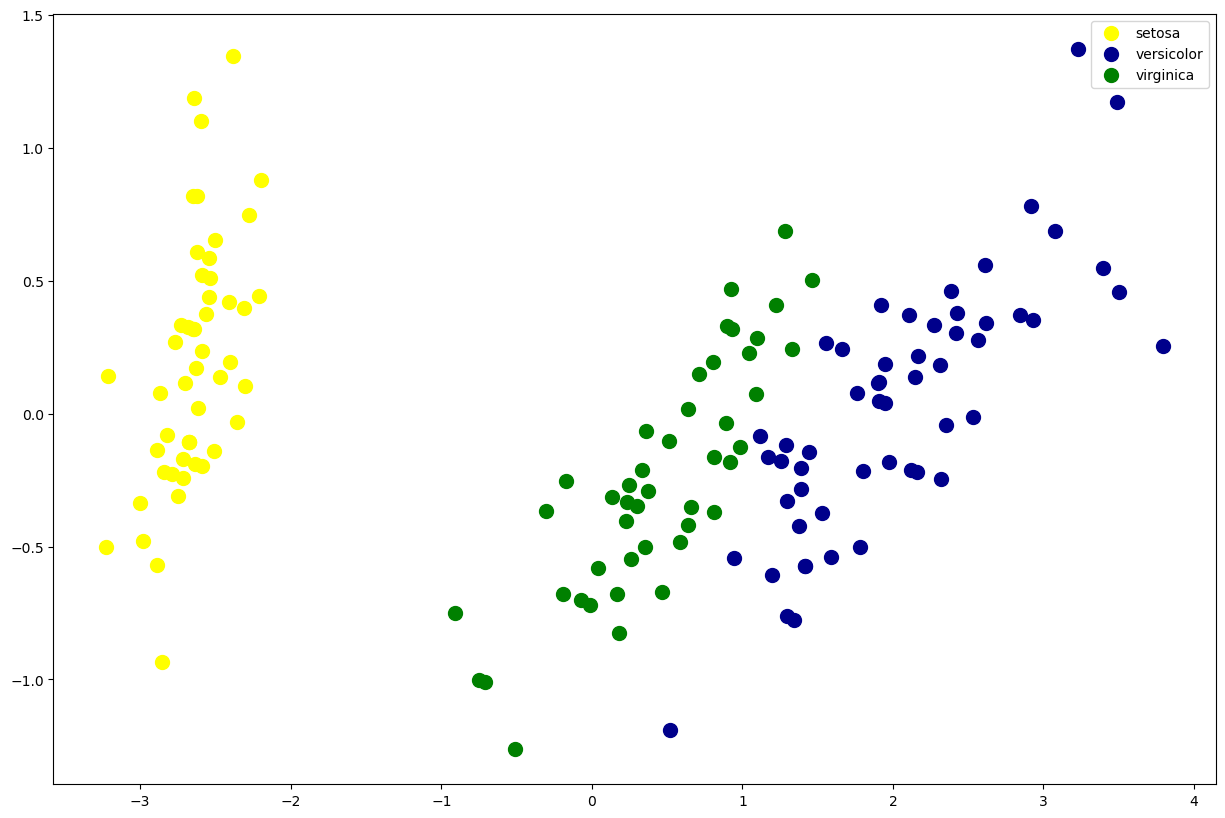

In [14]:
fig, ax =plt.subplots(1,1,figsize =(15,10))
for name, group in groups:
    ax.plot(group.PC1,group.PC2,color =col_code[name],label =label[name],marker='o',linestyle='',ms=10)
ax.legend()
plt.show()